<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EC%8B%AC%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism() # 테라스 버전오류 완화용

from tensorflow import keras

# 케라스 API에서 패션 MNIST 데이터 셋 불러오는 것
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
print("test : ", test_input.shape, test_target.shape)
print("tain : ", train_scaled.shape, train_target.shape)
print("val  : ", val_scaled.shape, val_target.shape)

test :  (10000, 28, 28) (10000,)
tain :  (48000, 784) (48000,)
val  :  (12000, 784) (12000,)


# 심층신경망
- 인공신경망에 층(layer)을 추가하여 데이터셋을 분류하는 것

<img src = "https://velog.velcdn.com/images/2kimjh/post/a04f8afe-a4f2-4d63-be58-120eefca1ecf/image.png" width = 500px>

# 심층(deep)신경망 생성_1
- Dense를 각각 생성후 합치는 방법

## 은닉층 & 출력층 생성

- 활성활 함수
    - 신경망 층의 선형 방정식 계산 값에 적용하는 함수
    - 출력층에 적용하는 활성화 함수는 종류가 제한되어 있음
    - 이진분류 : 시그모이드함수
    - 다중분류 : 소프트맥스함수 -> 분류를 위함

- 은닉층(hidden layer)
    - 인경신경망 모델에 2개의 레이어(layer)을 추가
    - 전에 만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집 층이 추가된 것
    - 은닉층에는 주황색원으로 활성화 함수가 표시되어 있다.
    - 활성화 함수가 자유롭다(대표적 : 시그모이드 함수, 볼 렐루함수)

    
a * 4 + 2 * b -> b * 3 -5 = c라고 할때, b가 하는 일 : 임시용 a * 12 +1 =c

신경망도 마찬가지로 은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈

선형 계산을 적당하게 비선형적으로 비틀어 줘야 함

그래야 다음층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할수 있다.

a * 4 + 2 * b -> log(b) = k -> k * 3 -5 = c 라고 했을 때, log(b) = k가 하는 일은?

In [4]:
#시그모이드 활성활 함수를 사용한 은닉층
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))

# 100개의  뉴런을 가진 밀집층
# input_shape=(784,) : 입력층의 크기(필수)

# 몇개의 뉴런이 필요한 지는 경험으로 기입
# 제약사항으로는 적어도 출력층의 뉴런보다는 많게 만들어야 한다.
# 클래스 10개에 대한 확률을 예측해야 하는데 은닉층의 뉴런이 10개 이하면 안됨

# 소프트맥스 함수를 사용한 출력층
dense2 = keras.layers.Dense(10, activation='softmax')
# 10개의 클래스를 분류하므로 10개의 뉴런을 둠

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## .Sequential(리스트)
- 모델을 만드는 데 사용
- 은닉층, 출력층순으로 입력

In [5]:
model = keras.Sequential([dense1, dense2])

# dense1, dense2를 Sequential클래스를 이용하여 심층(deep) 신경망을 만듬
# dense1, dense2를 리스트로 만들어 전달
# 주의 : 뒤가 출력층
# 인공신경망의 강력한 성능은 층을 추가하여 입력 데이터에 대해 연속적인 학습을 진행하는 능력 -> 2개 이상 층을 추가 가능

## 요약정보 : .summary()
- 층이름(클래스), 출력크기, 모델 파라미터 개수
    - 모델의 이름, 모델이 들어 있는 층(추가한 은닉층에서 출력층 순서대로)
- 층이름을 지정x시, 케라스가 자동으로 Dense라고 이름을 붙임
- 출력크기(샘플의 갯수(정의x시 None), 뉴런갯수)
- 파라미터 : 앞의 층의 갯수 * 뉴런갯수 + 절편
    - 미니배치 경사 하강법
        - 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한번에 모두 사용하지 않고 잘게 나누어 여러번 걸쳐 경사 하강법 단계를 수행
        - 케라스의 기본 미니배치 크기는 32개
    
- 이 값은 fit() 메서드에서 batch_size 매개변수로 변경가능
- 따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 None으로 설정이 최선

In [6]:
# 모델의 요약정보출력
model.summary()

# 신경망 층에서 입력되거나 출력되는 배열의 첫 번째 차원을 배치 자원이라고 부름
# 출력크기(None, 100 -> 은닉층의 뉴런 개수를 100개임으로 100개의 출력이 나옴)
#    => 샘플마다 784개의 픽셀 값이 은닉층을 통과하면서 100개의 특성으로 압충
# 마지막으로 파라미터 개수가 출력됨(784 * 100 + 100 = 78500)


# 두번째 층의 출력 크기 (None, 10) -> 뉴런 개수가 10개임
# 파라미터는 100 * 10 + 10 = 1010개

# 맨 아래있는 Non-trainable params : 0 (0.00 B)는 훈련되지 않는 파라미터
# 간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

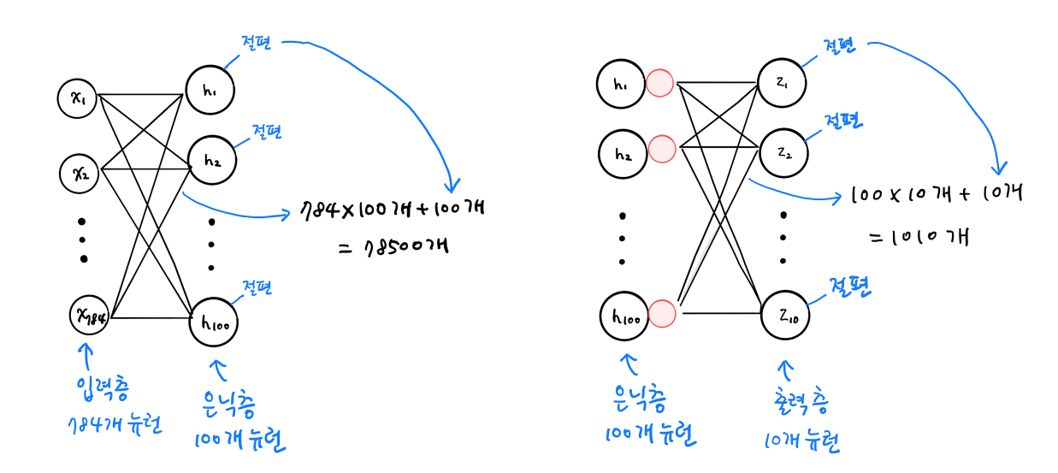

# 심층(deep) 신경망 생성_2
- Sequential 클래스에 층을 추가하는 방법
- 앞에 2개의 Dense는 따로 저장하여 쓸일이 없기때문에 생성자 안에 바로 Dense객체를 만드는 경우가 많음

## .Sequential(Dense객체)

In [7]:
model = keras.Sequential([# layer의 이름 정의(영어만)
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')],
    name="패션 MNIST 모델")
    # name : 모델의 이름정의
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

# 심층(deep) 신경망 생성_3
- 층(layer)을 추가하는 방법

## .add(Dense 객체)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

# 훈련

In [9]:
model.compile(loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7525 - loss: 0.7720
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8463 - loss: 0.4270
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8604 - loss: 0.3857
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8696 - loss: 0.3600
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8759 - loss: 0.3410


# 훈련평가(evaluate)


In [10]:
#훈련결과를 보면 훈련세트에 대한 성능이 추가된 층이 성능으 향상시켰다는 것을 알수 있음
model.evaluate(val_scaled, val_target)
#검증 점수 : 86.94%

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8733 - loss: 0.3530


[0.35684970021247864, 0.8694999814033508]

# 플래튼(Flatten)
- 시그로이드 함수의 한계
    - 초창기 인공 신경망의 은닉층에서 많이 사용되는 활성화 함수
    - 단점
        - 오른쪽, 왼쪽 끝으로 갈수록 그래프가 누워 올바른 출력을 만드는데 신속하게 대응하지 못함.
        - 특히 층이 많은 심층 신경망 일수록 그 효과가 누적되어 학습을 더 어렵게 만듬

- 렐루(ReLU)함수
    - 개선을 위해서 제안된 함수
    - 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고 음수일 경우 0으로 만듬
    - max(0,z)와 같이 씀 -> z가 0보다 크면 z를 출력하고 0보다 작으면 0을 출력
    - 특히 이미지 처리에 좋은 성능을 낸다고 함
    - True, False와 같이 분류트리로 사용

- Flatten(플래튼)
    - 단어의 뜻 : 단조롭게하다.
    - 은닉층에 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에 케라스에서 제공하는 편리한 층 하나가 있다.
    - 배치 자원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함(가중치, 절편 없음)
        - 절편 : 직선이 x절편 및 y절편를 통틀어 이르는 말
    - 하지만 플래튼 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라고 부름
    - 장점
        - 플래튼 클래스에 포함된 파라미터는 0개이므로,  케라스의 플래튼 층을 신경만 모델에 추가하면 입력값의 차원을 짐작할 수 있는 것

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ZafDv3VUm60Eh10OeJu1vw.png" width = 500px>

In [11]:
model = keras.Sequential()
# 입력층 바로 뒤에 플래튼 층 추가
model.add(keras.layers.Flatten(input_shape=(28,28)))
# 입력값의 파라미터 : 플래튼층 뉴런갯수 * 입력값뉴런갯수 + 절편

# (None, 784) : 784개의 입력이 첫 번째 은닉층에 전달됨
model.add(keras.layers.Dense(100, activation ='relu')) #렐루층 : True, False를 1단계에서 검사(픽셀)
model.add(keras.layers.Dense(10, activation ='softmax')) #소프트맥스층 : 다중분류
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

## 재훈련(reshpe제외)

In [12]:
# reshpe메서드 제외 : 2차원 해상도값을 그대로 사용
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [13]:
model.compile(loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5) # 전과 비교해보면 조금 향상

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7637 - loss: 0.6723
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8519 - loss: 0.4061
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8685 - loss: 0.3613
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8800 - loss: 0.3340
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8874 - loss: 0.3157


In [ ]:
"""
결과 : 위_전모델, 아래_플래튼모델
Epoch 1/5
3ms/step - accuracy: 0.7525 - loss: 0.7720
2ms/step - accuracy: 0.7637 - loss: 0.6723

Epoch 2/5
4ms/step - accuracy: 0.8463 - loss: 0.4270
2ms/step - accuracy: 0.8519 - loss: 0.4061

Epoch 3/5
2ms/step - accuracy: 0.8604 - loss: 0.3857
3ms/step - accuracy: 0.8685 - loss: 0.3613

Epoch 4/5
3ms/step - accuracy: 0.8696 - loss: 0.3600
3ms/step - accuracy: 0.8800 - loss: 0.3340

Epoch 5/5
2ms/step - accuracy: 0.8759 - loss: 0.3410
3ms/step - accuracy: 0.8874 - loss: 0.3157

전과 비교해보면 조금 향상
"""

## 훈련평가(.evaluate)

In [14]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.3861


[0.38933488726615906, 0.8648333549499512]

In [ ]:
"""
전모델
3ms/step - accuracy: 0.8733 - loss: 0.3530
[0.35684970021247864, 0.8694999814033508]

플래튼 모델
2ms/step - accuracy: 0.8651 - loss: 0.3861
[0.38933488726615906, 0.8648333549499512]

0.8695 | 0.8648 => 약간 하향
"""